In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generating synthetic data (creating the samples)
num_samples_per_class = 1000

negetive_samples = np.random.multivariate_normal(size=num_samples_per_class,mean = [0,3],cov=[[1,0.5],[0.5,1]])
postive_samples = np.random.multivariate_normal(size=num_samples_per_class,mean=[3,0],cov=[[1,0.5],[0.5,1]])

In [3]:
# Stacking the samples together
inputs = np.vstack((negetive_samples,postive_samples)).astype(np.float32)

In [4]:
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),np.ones((num_samples_per_class,1),dtype="float32")))


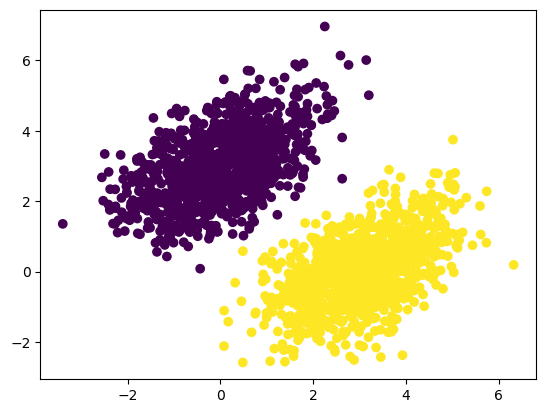

In [5]:
plt.scatter(inputs[:,0],inputs[:,1], c=targets[:,0])
plt.show()

In [6]:
# In linear classification, prediction = weight * input + bias --> affine transformation
input_dim = 2 # dimension of input(2 rank tensor i.e vector)
output_dim = 1 # dimension of output(1 rank tensor i.e scaler) : only the class 

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim))) # Weight matrix with shape (2,1)
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,))) # Bias matrix with shape(1,)

# Weight matrix
# W1 W2  ----> W1 and W2 and weight when the 1st input node makes connection with the 1st output node and 2nd output node respectively
# W3 W4  ----> W3 and W4 and weight when the 2nd input node makes connection with the 1st output node and 2nd output node respectively
# Thats y the shape is input_dim , output_dim   or  number of input features,number of classes in the target

# Bias matrix 
# Since we add bias at the last when calculating the output, then apply or not apply activation function, so bias is dependent only on ouput_dim

In [7]:
# Forward pass
def forward_pass(input):
    output = tf.matmul(input,W) + b # Matrix multiplication of weights and inputs and adding bias
    return output

In [8]:
def squared_error_loss(targets,prediction):
    per_sample_loss = tf.square(prediction-targets) # Calculating loss for each sample(or record in the dataset)
    total_loss = tf.reduce_mean(per_sample_loss) # Calculating the mean of the individual losses of each sample
    return total_loss

In [9]:
learning_rate = 0.01

def training_step(input,targets):
    with tf.GradientTape() as tape:
        predictions = forward_pass(input)
        loss = squared_error_loss(targets,predictions) 
        gradient_wrt_weight,gradient_wrt_bias = tape.gradient(loss,[W,b]) # Calculating the gradients wrt weights and biases
        W.assign_sub(gradient_wrt_weight*learning_rate) # Updating the weights
        b.assign_sub(gradient_wrt_bias*learning_rate) # Updating the bias
        return loss

In [10]:
# Batch input training done here
for steps in range(100):
    loss = training_step(inputs,targets) # The original synthetic data passed here
    print(f"Loss for the step : {steps+1} is ----> {loss} ")

Loss for the step : 1 is ----> 0.9723885655403137 
Loss for the step : 2 is ----> 0.762702226638794 
Loss for the step : 3 is ----> 0.6046652793884277 
Loss for the step : 4 is ----> 0.48540276288986206 
Loss for the step : 5 is ----> 0.3952696621417999 
Loss for the step : 6 is ----> 0.3270372152328491 
Loss for the step : 7 is ----> 0.2752837836742401 
Loss for the step : 8 is ----> 0.23594114184379578 
Loss for the step : 9 is ----> 0.20595420897006989 
Loss for the step : 10 is ----> 0.18302732706069946 
Loss for the step : 11 is ----> 0.16543392837047577 
Loss for the step : 12 is ----> 0.1518745720386505 
Loss for the step : 13 is ----> 0.14137029647827148 
Loss for the step : 14 is ----> 0.1331830471754074 
Loss for the step : 15 is ----> 0.12675556540489197 
Loss for the step : 16 is ----> 0.12166691571474075 
Loss for the step : 17 is ----> 0.11759862303733826 
Loss for the step : 18 is ----> 0.11430949717760086 
Loss for the step : 19 is ----> 0.1116165742278099 
Loss for the

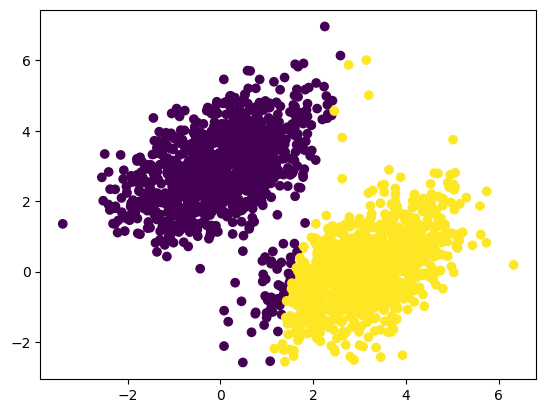

In [15]:
predictions = forward_pass(inputs) # Since forward_pass contains our model predicting the target
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0] > 0.5) # Plotting the scatter plot (if predictions>0.5 then 1 else 0)